In [16]:
# for loading/processing the images
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# models
from keras.applications.vgg16 import VGG16
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [23]:
path = r"D:\Alek\Programming\Machine Learning\Rovovi\images\combined"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            images.append(file.name)

In [28]:
# load the image as a 224x224 array
img = load_img(images[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)

x = preprocess_input(reshaped_img)

(224, 224, 3)
(1, 224, 224, 3)


In [29]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

553467096/553467096 [==============================] - 49s 0us/step

In [30]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img)
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [31]:
data = {}
p = r"D:\Alek\Programming\Machine Learning\Rovovi\images\combined\image_features.pkl"

# lop through each image in the dataset
for image in images:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(image,model)
        data[image] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)

1/1 [==============================] - 0s 293ms/step


In [35]:
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
print(feat.shape)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
print(feat.shape)

# get the unique labels (from the image_labels.csv)
# df = pd.read_csv('image_labels.csv')
label = ['rov','suma']
unique_labels = list(set(label))

(64, 1, 4096)
(64, 4096)


In [37]:
pca = PCA(n_components=54, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [40]:
kmeans = KMeans(n_clusters=2, random_state=22)
kmeans.fit(x)



KMeans(n_clusters=2, random_state=22)

In [42]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)


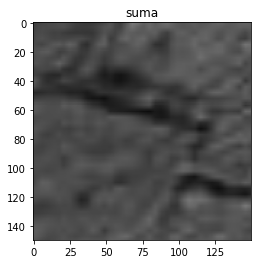

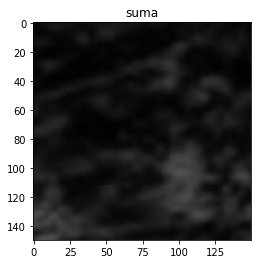

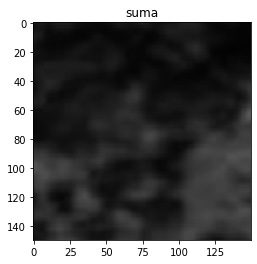

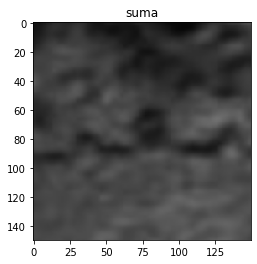

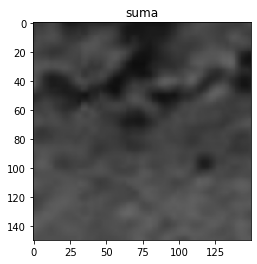

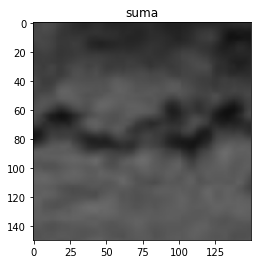

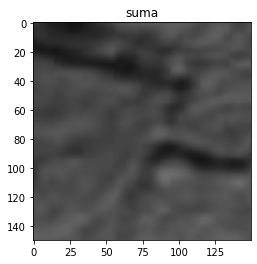

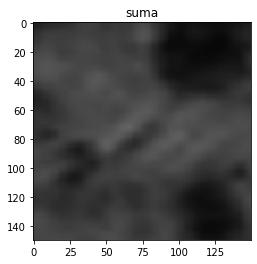

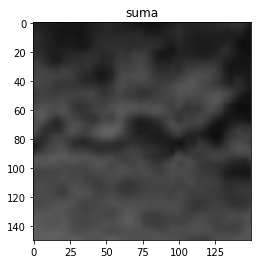

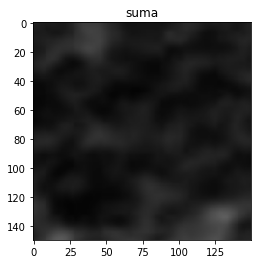

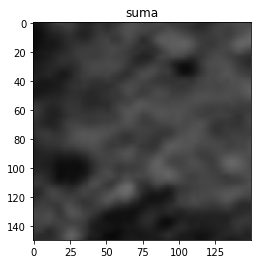

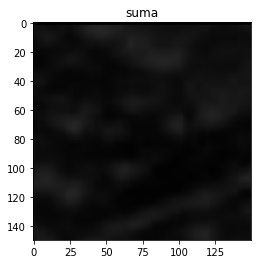

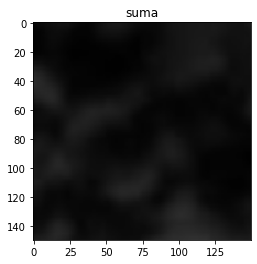

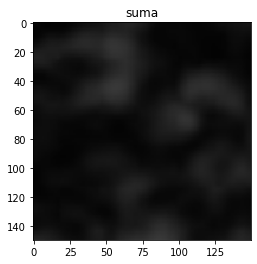

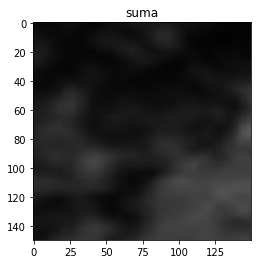

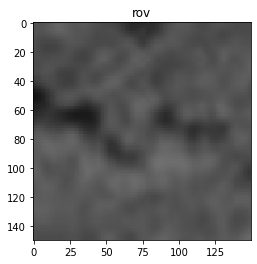

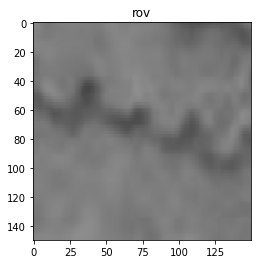

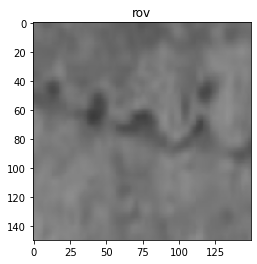

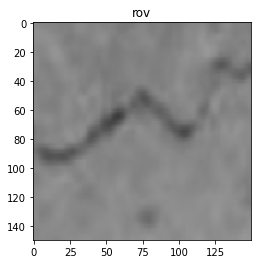

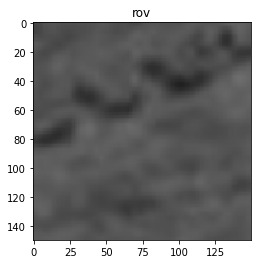

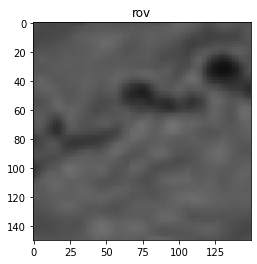

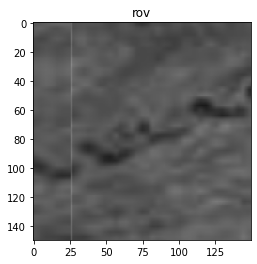

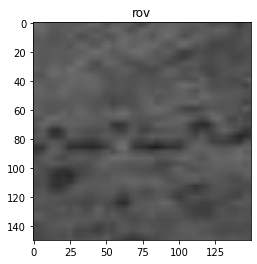

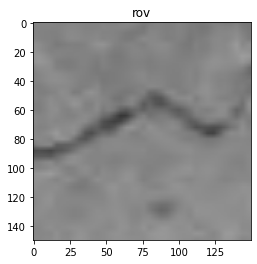

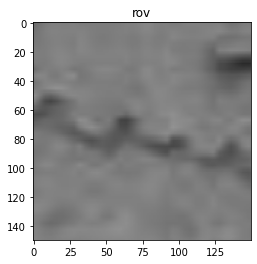

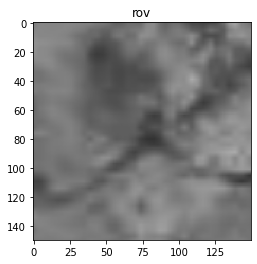

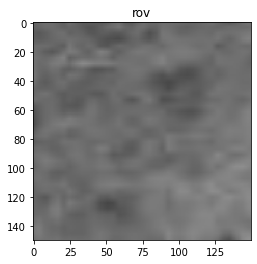

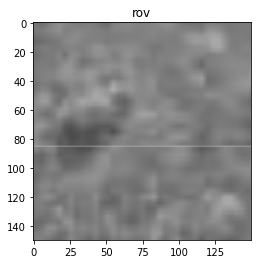

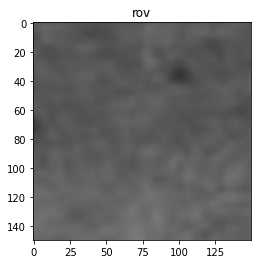

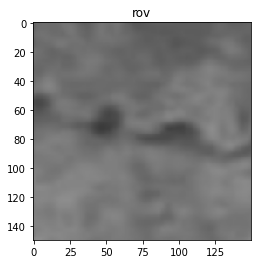

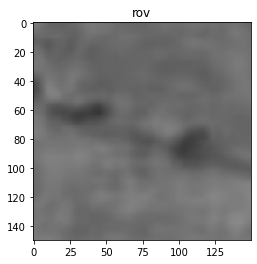

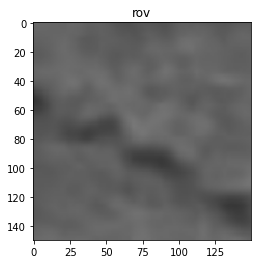

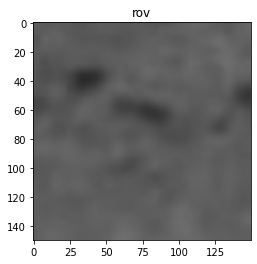

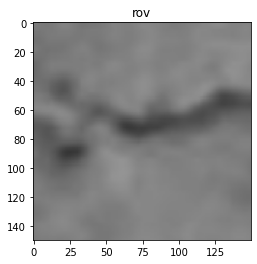

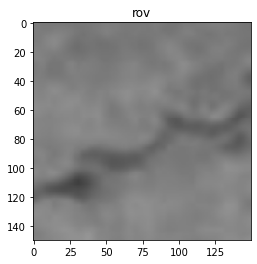

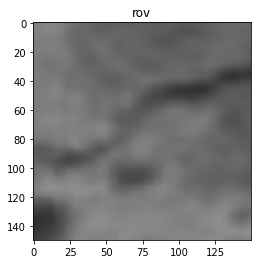

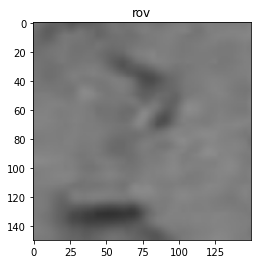

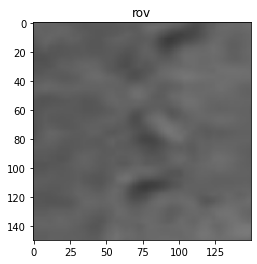

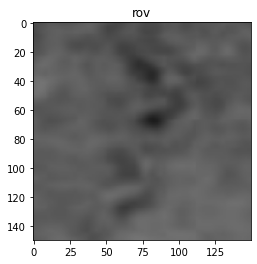

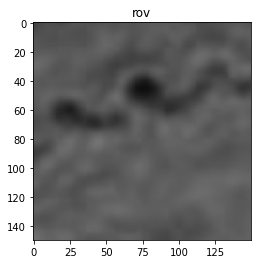

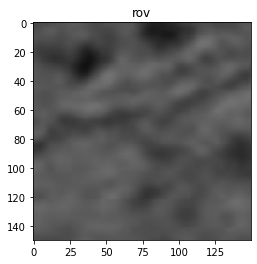

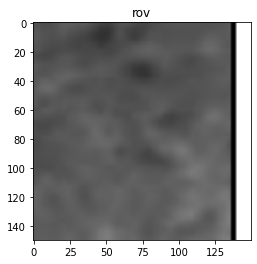

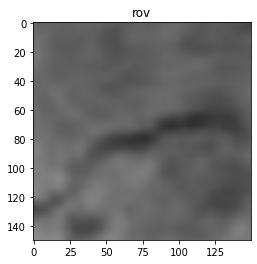

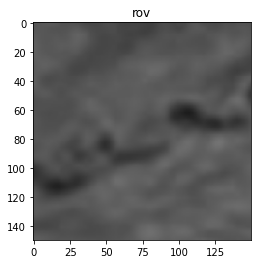

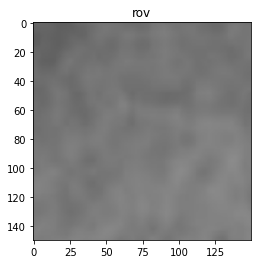

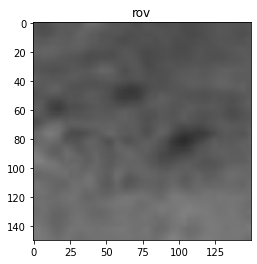

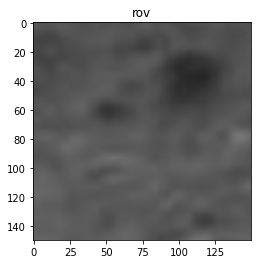

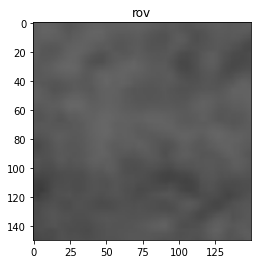

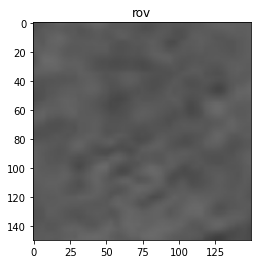

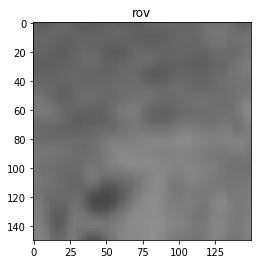

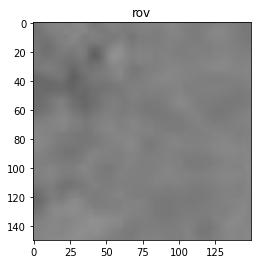

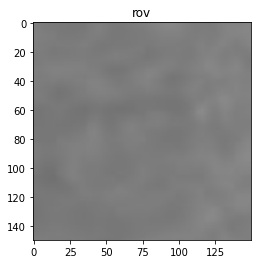

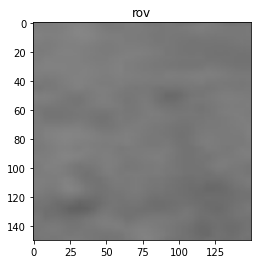

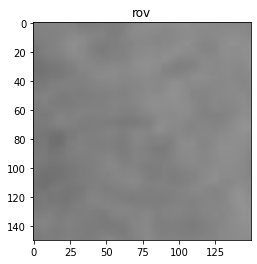

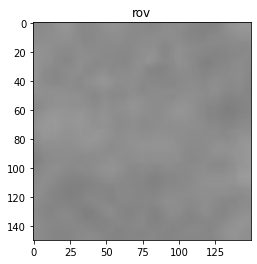

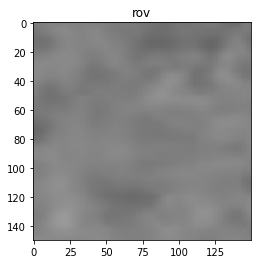

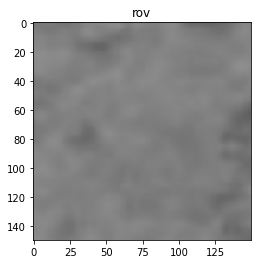

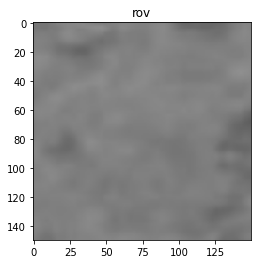

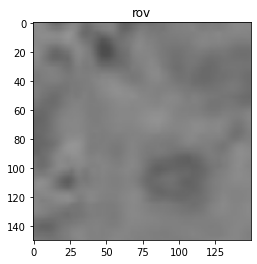

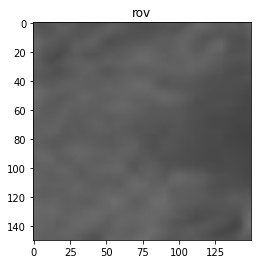

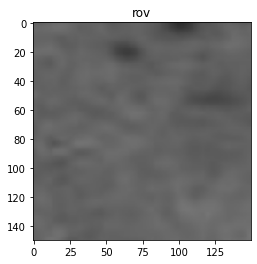

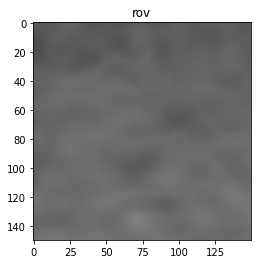

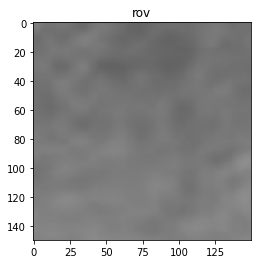

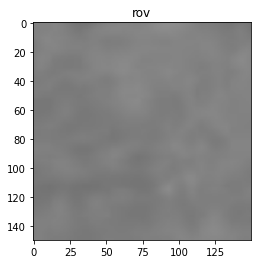

In [50]:
from keras_preprocessing import image
for filename in groups[0]:
    img1 = image.load_img(f'D:\Alek\Programming\Machine Learning\Rovovi\images\combined\\{filename}',target_size=(150,150))
    plt.imshow(img1)
    plt.title('suma')
    plt.show()
for filename in groups[1]:
    img1 = image.load_img(f'D:\Alek\Programming\Machine Learning\Rovovi\images\combined\\{filename}',target_size=(150,150))
    plt.imshow(img1)
    plt.title('rov')
    plt.show()
